In [8]:
import sys

sys.path.append("..")
# this is what you need for python script
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from partipy.arch import AA
from partipy.const import OPTIM_ALGS
from partipy.generate_test_data import simulate

N_SAMPLES = 50_000
N_ARCHETYPES = 8
N_DIMENSIONS = 20

X, A, Z = simulate(n_samples=N_SAMPLES,
                   n_archetypes=N_ARCHETYPES,
                   n_dimensions=N_DIMENSIONS,
                   noise_std=0.0)

In [11]:
df_list = []
for optim_alg in OPTIM_ALGS:
# for optim_alg in ["frank_wolfe"]:
    AA_object = AA(n_archetypes=N_ARCHETYPES,
                   weight=None,
                   optim=optim_alg,
                   init="random",
                #    init="furthest_sum",
                   max_iter=50).fit(X)
    df_list.append(pd.DataFrame({
        "rss": AA_object.RSS_trace.copy(),
        "iteration": np.arange(len(AA_object.RSS_trace)),
        "algorithm": optim_alg
    }))
plot_df = pd.concat(df_list, axis=0)
plot_df

,rss,iteration,algorithm
0,11372.841964,0,regularized_nnls
1,6713.133276,1,regularized_nnls
2,3522.590736,2,regularized_nnls
3,1453.490900,3,regularized_nnls
4,696.280713,4,regularized_nnls
...,...,...,...
45,238.534781,45,frank_wolfe
46,236.547308,46,frank_wolfe
47,234.616564,47,frank_wolfe
48,232.825839,48,frank_wolfe


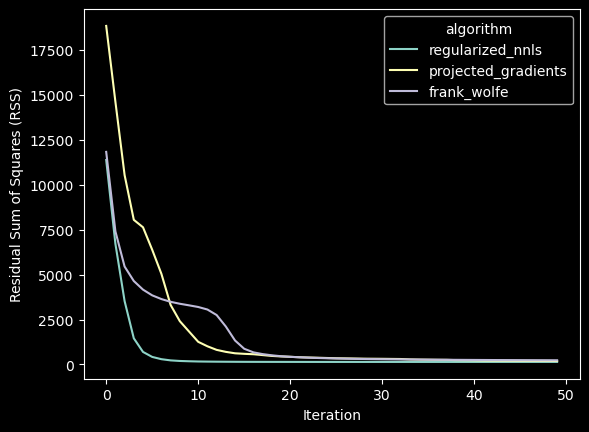

In [ ]:
plt.style.use("dark_background")
sns.lineplot(data=plot_df, x="iteration", y="rss", hue="algorithm")
plt.xlabel("Iteration")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.show()
#random

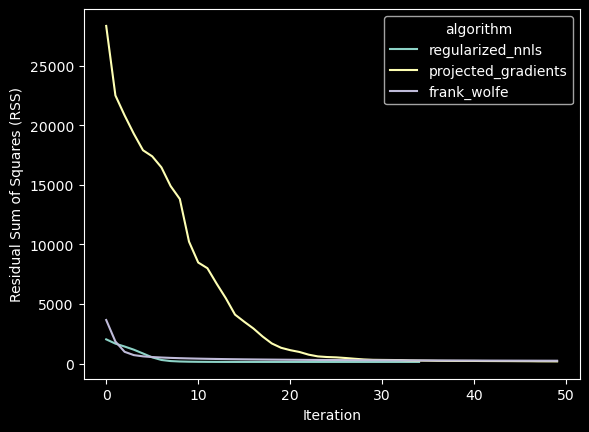

In [ ]:
plt.style.use("dark_background")
sns.lineplot(data=plot_df, x="iteration", y="rss", hue="algorithm")
plt.xlabel("Iteration")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.show()
#furthest sum